In [1]:
import pandas as pd
import json

In [3]:
with open("data/resnet-age-scores.json") as fh:
    scores = json.load(fh)

In [5]:
dat = pd.read_csv('data/outcome-results.csv')

In [7]:
dat = dat[dat.ecg_order == 1]

In [13]:
scores_df = pd.DataFrame.from_dict(scores, orient="index", columns = ['age_pred'])

In [21]:
scores_df = scores_df.reset_index().rename(columns={'index': 'study_id'})

In [24]:
scores_df.study_id = scores_df.study_id.astype('int64')

In [25]:
scores_df = scores_df.set_index("study_id")

In [29]:
dat = dat.join(scores_df, on = "study_id")

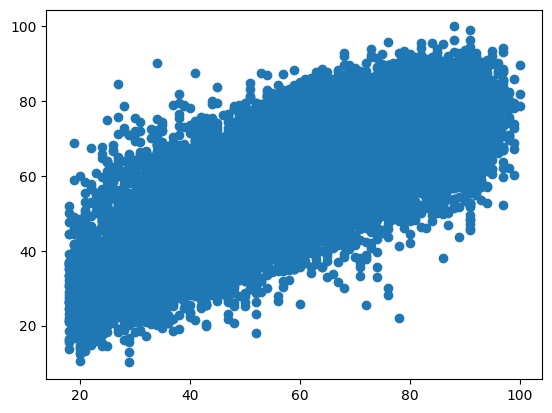

In [35]:
import matplotlib.pyplot as plt

plt.scatter(dat.admission_age, dat.age_pred)

In [37]:
dat['age_delta'] = dat['age_pred'] - dat['admission_age']

In [41]:
dat['age_delta_quant'] = pd.qcut(dat['age_delta'], q = 10)

In [49]:
dat['icu_mort'] = (dat['icu_outtime'] >= dat['dischtime']) & (dat['hospital_expire_flag'] == 1)

In [50]:
dat.groupby('age_delta_quant').agg({'hospital_expire_flag': 'mean', 'icu_mort': 'mean'})

,hospital_expire_flag,icu_mort
age_delta_quant,,
"(-56.05, -15.19]",0.170539,0.117492
"(-15.19, -10.745]",0.139413,0.088338
"(-10.745, -7.537]",0.130235,0.083973
"(-7.537, -4.732]",0.121876,0.082858
"(-4.732, -2.06]",0.107213,0.064898
"(-2.06, 0.615]",0.114862,0.074529
"(0.615, 3.563]",0.096032,0.062925
"(3.563, 7.023]",0.100175,0.069049
"(7.023, 11.976]",0.089235,0.062267
